# Healthcare spending by individuals

This notebook takes a MEPS dataset and computes ... 



Work in progress...  

Links

* https://en.wikipedia.org/wiki/Medical_Expenditure_Panel_Survey
* http://meps.ahrq.gov/mepsweb/data_stats/download_data_files.jsp 


This notebook was adapted by Dave Backus from one created by Luke K. Min for use in the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  We thank Martin Hackmann for the suggestion and the reference to [this report](http://www.nihcm.org/pdf/DataBrief3%20Final.pdf).  

In [1]:
import pandas as pd
import numpy as np 

In [2]:
file = '../csv/MEPS_H155.csv'
url  = ''
meps = pd.read_csv(file)

C:\Users\dbackus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (59,62,65,68,504,505,1792,1793,1820,1826) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
meps.shape

(5175, 1883)

In [3]:
list(meps)

['DUID',
 'PID',
 'DUPERSID',
 'PANEL',
 'FAMID31',
 'FAMID42',
 'FAMID53',
 'FAMID12',
 'FAMIDYR',
 'CPSFAMID',
 'FCSZ1231',
 'FCRP1231',
 'RULETR31',
 'RULETR42',
 'RULETR53',
 'RULETR12',
 'RUSIZE31',
 'RUSIZE42',
 'RUSIZE53',
 'RUSIZE12',
 'RUCLAS31',
 'RUCLAS42',
 'RUCLAS53',
 'RUCLAS12',
 'FAMSZE31',
 'FAMSZE42',
 'FAMSZE53',
 'FAMSZE12',
 'FMRS1231',
 'FAMS1231',
 'FAMSZEYR',
 'FAMRFPYR',
 'REGION31',
 'REGION42',
 'REGION53',
 'REGION12',
 'MSA31',
 'MSA42',
 'MSA53',
 'MSA12',
 'REFPRS31',
 'REFPRS42',
 'REFPRS53',
 'REFPRS12',
 'RESP31',
 'RESP42',
 'RESP53',
 'RESP12',
 'PROXY31',
 'PROXY42',
 'PROXY53',
 'PROXY12',
 'INTVLANG',
 'BEGRFD31',
 'BEGRFM31',
 'BEGRFY31',
 'ENDRFD31',
 'ENDRFM31',
 'ENDRFY31',
 'BEGRFD42',
 'BEGRFM42',
 'BEGRFY42',
 'ENDRFD42',
 'ENDRFM42',
 'ENDRFY42',
 'BEGRFD53',
 'BEGRFM53',
 'BEGRFY53',
 'ENDRFD53',
 'ENDRFM53',
 'ENDRFY53',
 'ENDRFD12',
 'ENDRFM12',
 'ENDRFY12',
 'KEYNESS',
 'INSCOP31',
 'INSCOP42',
 'INSCOP53',
 'INSCOP12',
 'INSC1231',
 '

In [2]:
#Take a look at how the data is formatted.
MEPS = pd.DataFrame.from_csv('DATA/H155.CSV', index_col=None)
MEPS.head()


/Applications/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (59,62,65,68,504,505,1792,1793,1820,1826) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,DUID,PID,DUPERSID,PANEL,FAMID31,FAMID42,FAMID53,FAMID12,FAMIDYR,CPSFAMID,...,RXOSR12,RXPTR12,RXOTH12,PERWT12F,FAMWT12F,FAMWT12C,SAQWT12F,DIABW12F,VARSTR,VARPSU
0,20004,101,20004101,17 PANEL 17,A,A,A,A,A,A,...,0,0,0,5278.8731,5507.4827,5507.4827,6821.5242,0,1109,1
1,20004,102,20004102,17 PANEL 17,A,A,A,A,A,A,...,0,0,0,5487.2298,5507.4827,5507.4827,6842.4318,0,1109,1
2,20004,103,20004103,17 PANEL 17,A,A,A,A,A,A,...,0,0,0,4393.8235,5507.4827,5507.4827,0.0000,0,1109,1
3,20005,101,20005101,17 PANEL 17,A,A,A,A,A,A,...,0,0,53,4218.8032,3566.9810,3566.9810,4164.1973,0,1109,2
4,20005,102,20005102,17 PANEL 17,A,A,A,A,A,A,...,0,0,0,5666.9517,3566.9810,3566.9810,5537.4505,0,1109,2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
#What columns are there? Make sure to reference the crosswalk.
list(MEPS.columns.values)

['DUID',
 'PID',
 'DUPERSID',
 'PANEL',
 'FAMID31',
 'FAMID42',
 'FAMID53',
 'FAMID12',
 'FAMIDYR',
 'CPSFAMID',
 'FCSZ1231',
 'FCRP1231',
 'RULETR31',
 'RULETR42',
 'RULETR53',
 'RULETR12',
 'RUSIZE31',
 'RUSIZE42',
 'RUSIZE53',
 'RUSIZE12',
 'RUCLAS31',
 'RUCLAS42',
 'RUCLAS53',
 'RUCLAS12',
 'FAMSZE31',
 'FAMSZE42',
 'FAMSZE53',
 'FAMSZE12',
 'FMRS1231',
 'FAMS1231',
 'FAMSZEYR',
 'FAMRFPYR',
 'REGION31',
 'REGION42',
 'REGION53',
 'REGION12',
 'MSA31',
 'MSA42',
 'MSA53',
 'MSA12',
 'REFPRS31',
 'REFPRS42',
 'REFPRS53',
 'REFPRS12',
 'RESP31',
 'RESP42',
 'RESP53',
 'RESP12',
 'PROXY31',
 'PROXY42',
 'PROXY53',
 'PROXY12',
 'INTVLANG',
 'BEGRFD31',
 'BEGRFM31',
 'BEGRFY31',
 'ENDRFD31',
 'ENDRFM31',
 'ENDRFY31',
 'BEGRFD42',
 'BEGRFM42',
 'BEGRFY42',
 'ENDRFD42',
 'ENDRFM42',
 'ENDRFY42',
 'BEGRFD53',
 'BEGRFM53',
 'BEGRFY53',
 'ENDRFD53',
 'ENDRFM53',
 'ENDRFY53',
 'ENDRFD12',
 'ENDRFM12',
 'ENDRFY12',
 'KEYNESS',
 'INSCOP31',
 'INSCOP42',
 'INSCOP53',
 'INSCOP12',
 'INSC1231',
 '

In [4]:
#This checks how many (rows, columns).
np.shape(MEPS)

(5175, 1883)

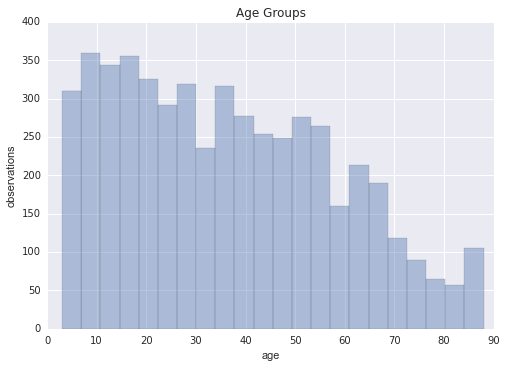

In [21]:
#Take a brief look at which age groups we are looking at. A histogram.
import seaborn as sns
sns.set(style="darkgrid")

year_of_birth = MEPS.DOBYY
age = 2015 - year_of_birth
sns.distplot(age, kde=False)
plt.xlabel('age')
plt.ylabel('observations')
plt.title('Age Groups')


In [16]:
age.describe()

count    5175.000000
mean       36.382802
std        21.823397
min         3.000000
25%        18.000000
50%        34.000000
75%        53.000000
max        88.000000
Name: DOBYY, dtype: float64

In [17]:
#Now let's look at the medical expenditures column.
t = MEPS.TOTEXP12

In [18]:
total_exp = MEPS.TOTEXP12.order()
t = total_exp.reset_index().TOTEXP12

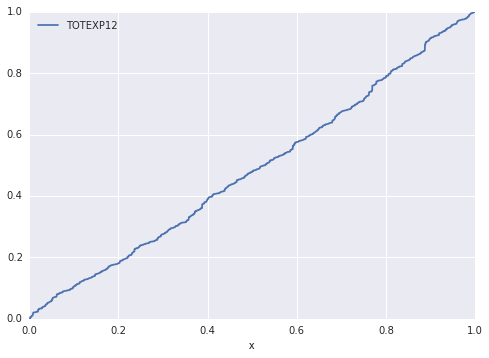

In [158]:
#We would like to see a cumulative distribution of health care spending.
cdf = np.cumsum(t) / 15221120
index1 = cdf.reset_index().index / 5175
cdf = cdf.reset_index()
cdf['x'] = index1
cdf.plot(x='x', y='TOTEXP12')
#y = cdf.index / 5175

#cdf.plot(x='y')

(-4.2566120289657263,
 89.256612028965748,
 -13658.959918043447,
 286837.9599180434)

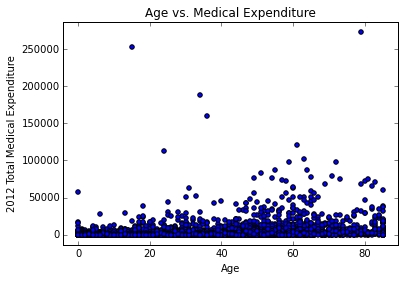

In [113]:
#Now we would like to weave the two together - age and medical expenses.
age_exp = MEPS.groupby(['DOBYY', 'TOTEXP12']).size()
plt.scatter(x=(2012 - MEPS.DOBYY), y=MEPS.TOTEXP12)
plt.xlabel('Age')
plt.ylabel('2012 Total Medical Expenditure')
plt.title('Age vs. Medical Expenditure')
plt.axis('tight')

#Run a regression? Ask Prof Backus about this.

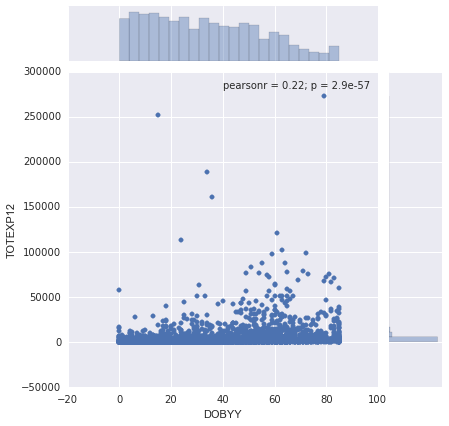

In [30]:
age = 2012 - MEPS.DOBYY
exp = MEPS.TOTEXP12

sns.jointplot(x=age, y=exp)

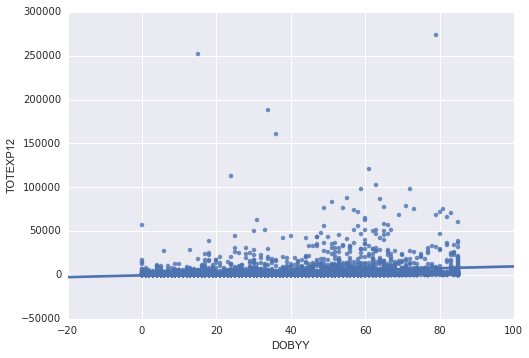

In [34]:
#Try running a regression?
sns.regplot(x=age, y=exp)

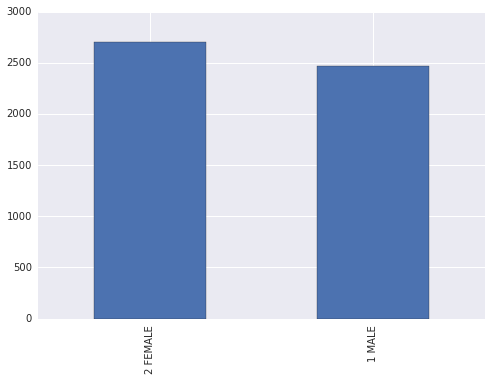

In [36]:
#How about gender? Quick look at gender distribution. There are more female observations.
MEPS.SEX.value_counts().plot(kind='bar')

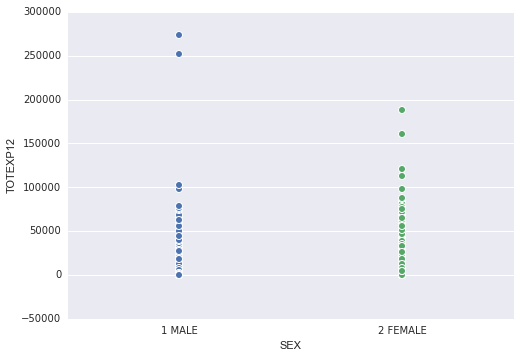

In [63]:
#Gender and Expenditures
sns.stripplot(x=MEPS.SEX, y=MEPS.TOTEXP12)

In [126]:
def bottom_percent(list, percent):
    total = 0
    for x in list:
        if x < np.percentile(list, percent):
            total = total + x
    return total

def top_percent(list, percent):
    total = 0
    for x in list:
        if x > np.percentile(list, percent):
            total = total + x
    return total

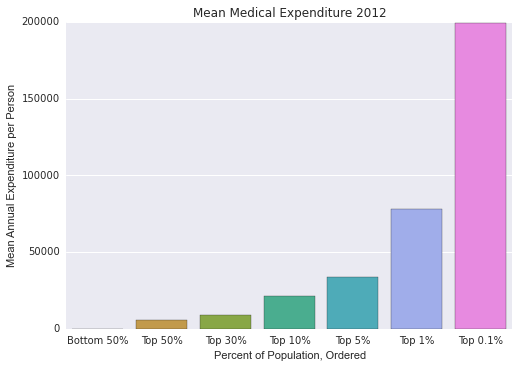

In [194]:
#Mean spending of portions of sample
def bottom_mean_spending (list, percent):
    return np.mean(list[list <= np.percentile(list, percent)])

def top_mean_spending (list, percent):
    return np.mean(list[list >= np.percentile(list, percent)])

Means = (bottom_mean_spending (exp, 50),
         top_mean_spending (exp, 50),
         top_mean_spending (exp, 70),
         top_mean_spending (exp, 90),
         top_mean_spending (exp, 95),
         top_mean_spending (exp, 99),
         top_mean_spending (exp, 99.9))

bins = ("Bottom 50%", "Top 50%", "Top 30%", 
        "Top 10%", "Top 5%", "Top 1%", "Top 0.1%")

sns.barplot(bins, Means)
plt.title('Mean Medical Expenditure 2012')
plt.xlabel('Percent of Population, Ordered')
plt.ylabel('Mean Annual Expenditure per Person')

In [46]:
np.percentile(exp, 50)

382.0

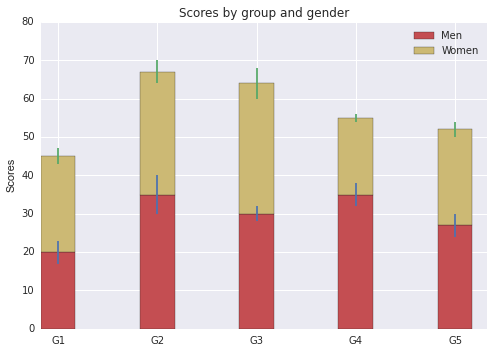

In [35]:
##THIS IS JUST A SAMPLE CODE FROM THE WEB.
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,   width, color='r', yerr=womenStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=menStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind+width/2., ('G1', 'G2', 'G3', 'G4', 'G5') )
plt.yticks(np.arange(0,81,10))
plt.legend( (p1[0], p2[0]), ('Men', 'Women') )

plt.show()